## Introduction





As an economist at world trade/bank organization, we will be working with the country wise statistics to get the different correlation variables



For an economy, its overall performance is shown by the indicators such as national income, happinesss, score, corruption level, generosity score.

It is important to determine how these variables are related to each other for economics and other ways. For example, if a lower level of corruption is followed by a higher income, it would sugest the government to work onthese factors.

To do so , we will be working with two dataset:

climate:

national income indicators;


* One based 
https://www.kaggle.com/code/sevgisarac/climate-change

https://www.kaggle.com/datasets/unsdsn/world-happiness


Following are the questions that we would look to answer

### National Indicators

* Is there significant relationship between happiness score and gdp per capita?

* Is there significant relationship between generosity and income

* Is there significant relationship between income and corruption?


### Climate Change:


* Is there significant difference in mean tempersture chnage over the decade?



* Is there a significance difference in temperature change for different continents.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
from scipy.stats import pearsonr ,shapiro,kstest , spearmanr, kendalltau
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Temperature_change_Data.csv to Temperature_change_Data.csv
Saving 2015.csv to 2015.csv


In [3]:
df  = pd.read_csv('2015.csv')
df1 = pd.read_csv('Temperature_change_Data.csv')

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# look at the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Is there significant relationship between happiness score and gdp per capita?

We will be using scatterplot and also, look at the  shapiro-wilk test as well. This tests the null hypothesis that the data was drawn from a normal distribution.


### Testing Normality for happiness score

In [6]:
# let us create a function for normality and correlation
def is_normal(var):
  if shapiro(var)[1]< 0.05:
    print("we reject the null hypothesis of normality")
  else:
     print("there is normality present in the data")  

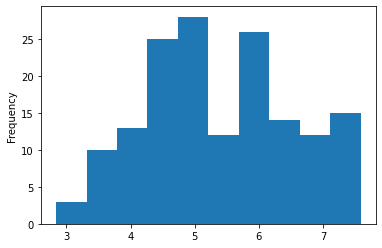

In [7]:
# we will first check for presence of normality in both variables
df['Happiness Score'].plot(kind='hist')

In [8]:
# look at the normality test
is_normal(df['Happiness Score'])

we reject the null hypothesis of normality


Another test is  [kstesta Kolmogorov-Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

In [9]:
# let us conduct it too
from scipy.stats import norm
kstest(df['Happiness Score'],norm.cdf)

KstestResult(statistic=0.9977372421542715, pvalue=0.0)

So, it is non-normal using the tests available.

#### Look for normality in GDP per capita

(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([0.      , 0.169042, 0.338084, 0.507126, 0.676168, 0.84521 ,
        1.014252, 1.183294, 1.352336, 1.521378, 1.69042 ]),
 <a list of 10 Patch objects>)

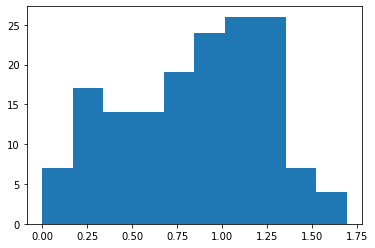

In [10]:
# look at the histogram
plt.hist(df['Economy (GDP per Capita)'])

In [11]:
# using shapiro test
stat , p_val = shapiro(df['Economy (GDP per Capita)'])
if p_val<0.05:
  print("We reject the presence of normality in the GDP per capita feature")
else:
  print("The given dataset comes from normality")  

We reject the presence of normality in the GDP per capita feature


###  Correlation

It is the way we gauge the association /movement between two variables. There are mainly three types:

a) [Pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

b) [Spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

c) [Kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

Since the  both features are not normal and pearsonr correlation uses mean value in its calculation, using pearsonr correlation would lead to biased results. Therefore, parametric test pearsonr (which is gauge of linear relationship) , can not be applied here. 

 Coming to its alternative, we have two parametric methods/tests:

* Spearman
* Kendell

Both work similar to pearsonr. However, they first convert the real values of dataset into ranking and then, gauges the correlation between them.

Let us define the function which tells us whether there is correlation present using non-parametric way(kendell and spearman)


In [12]:
def corr_sig_non_para(val1,val2):
  """
  This function will give us correlation for two variables using spearman and kendell methods
  """
  cor, p_val = spearmanr(val1,val2)
  # using spearman method
  if p_val < 0.05:
    print("There is a significant correlation of  {} between the given number of variables using spearman method ".format(cor))
  else:
    print("Since the correlation value is quite negligible and equal to {} ,there is no significant correlation between these variables using  spearman method".format(cor))
  # using kendell    
  cor1, p_val1  =  kendalltau(val1,val2)
  if p_val1 < 0.05:
    print("There is a significant correlation of  {} between the given number of variables using kendell method".format(cor1))
  else:
    print(" Since the correlation value is quite negligible and equal to {} ,there is no significant correlation between these variables using  kendell method".format(cor1))

In [13]:
corr_sig_non_para(df['Happiness Score'],df['Economy (GDP per Capita)'])

There is a significant correlation of  0.7957028014396273 between the given number of variables using spearman method 
There is a significant correlation of  0.5929449712538652 between the given number of variables using kendell method


Text(0.5, 1.0, 'Scatterplot Diagram')

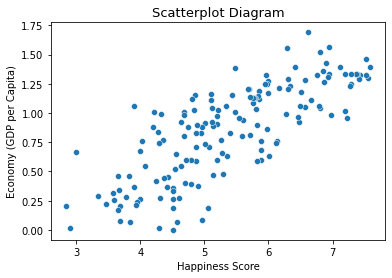

In [14]:
# look at the scatterplot too
sns.scatterplot(df['Happiness Score'],df['Economy (GDP per Capita)'])
plt.title("Scatterplot Diagram",fontsize=13)

Since here we do not use pearsonr which gauges the linear relationship , we cannot say there is a linear relation by test itself.

However, by kendall and spearmanr tests, it can be said that there is a significant monotic and positive relationship (it could be linear or non-linear).

Note: Both kendall and spearman are calculated differently (one mainly ranking and another using pair of observations at once and then see the difference in sign).






#### Second question: Is there significant relationship between generosity and income?



In [15]:
# checking for normality using the pre-defined function
is_normal(df['Generosity']) 
is_normal(df['Economy (GDP per Capita)'])

we reject the null hypothesis of normality
we reject the null hypothesis of normality


Thus, both are non-normal, which makes it not possible to test correlation using pearson. Let us use the defined method for non-parametric correlation
:

In [16]:
# using method already defined
corr_sig_non_para(df['Generosity'],df['Economy (GDP per Capita)'])

Since the correlation value is quite negligible and equal to 0.012481764150182775 ,there is no significant correlation between these variables using  spearman method
 Since the correlation value is quite negligible and equal to -0.005240667580424092 ,there is no significant correlation between these variables using  kendell method


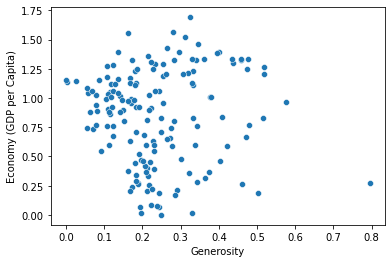

In [17]:
# to confirm it we will use scatterplot
sns.scatterplot(df['Generosity'],df['Economy (GDP per Capita)'])

From the above analysis and charts, it can be see that the generosity is not correlated with the income level. That is, one cannot say that a higher income level is associated with a higher generosity.

#### Is there significance relationship between income and corruption level.

In [18]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [19]:
# look for normality
is_normal(df['Economy (GDP per Capita)'])
is_normal(df['Trust (Government Corruption)'])

we reject the null hypothesis of normality
we reject the null hypothesis of normality


In [20]:
# getting correlation using non-parametric test

corr_sig_non_para(df['Economy (GDP per Capita)'],df['Trust (Government Corruption)'])

There is a significant correlation of  0.22767485321942788 between the given number of variables using spearman method 
There is a significant correlation of  0.14255190497373316 between the given number of variables using kendell method


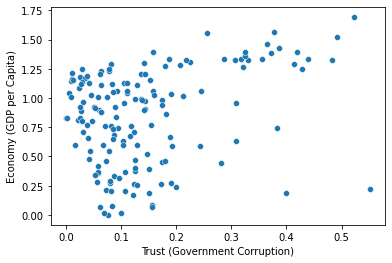

In [21]:
# to confirm it we will use scatterplot
sns.scatterplot(df['Trust (Government Corruption)'],df['Economy (GDP per Capita)'])

As we can see there is presence of mild and significant correlation between income and government corruption.

In [53]:
def pearson_r(var1,var2):
  """ 
  It will give us the correlation for the variables meeting the conditions/ assumptions of normal distribution
  """
  cor1, p_val1  =  pearsonr(val1,val2)
  if p_val1 < 0.05:
    print("There is a significant correlation of  {} between the given number of variables using pearsonr method".format(cor1))
  else:
    print(" Since the correlation value is quite negligible and equal to {} ,there is no significant correlation between these variables using  pearsonr method".format(cor1))
  _

In [54]:
# let us create a function for normality and correlation
def var_corr_test(var1, var2):

  """

It will check for normality, based on the results derived we would be using anyone of the three methods of correlation
"""
  if shapiro(var1)[1]< 0.05 and shapiro(var2)[1] <0.05:
    print("we reject the null hypothesis of normality")
    #var1  = input("which feature would be chosen")
    #var2 = input("which feature other the above one would be chosen")
    #if var1 != var2:
    corr_sig_non_para(var1,var2)
    #else:
    #print('The features should be different')  

  else:
     print("there is normality present in the data so we will be using the pearon_r test")
     pearson_r(var1,var2)

### Climate Change:


Now, its time to look at the  climate change over time. With regard to it, we will try to answer the following questions:

* Is there a significant difference in mean temperature change decade wise?

* Is there a significant difference in mean temperature continent wise?

In [24]:
# look at the second dataset
df1.head()

,Country Code,Country Name,year,tem_change
0,AFG,Afghanistan,1961,-0.080
1,ALB,Albania,1961,0.631
2,DZA,Algeria,1961,0.186
3,ASM,American Samoa,1961,-0.014
4,AND,Andorra,1961,0.749


In [25]:
df1.shape

(16756, 4)

In [26]:
df1.head()

,Country Code,Country Name,year,tem_change
0,AFG,Afghanistan,1961,-0.080
1,ALB,Albania,1961,0.631
2,DZA,Algeria,1961,0.186
3,ASM,American Samoa,1961,-0.014
4,AND,Andorra,1961,0.749


In [27]:
# look at the numerical value
df1.describe()

,year,tem_change
count,16756.000000,14975.000000
mean,1990.000000,0.484160
std,17.029895,0.628342
min,1961.000000,-3.252000
25%,1975.000000,0.035000
50%,1990.000000,0.412000
75%,2005.000000,0.882000
max,2019.000000,5.413000


The climate change is from 1961 to 2019.



(array([1.000e+00, 1.100e+01, 2.510e+02, 5.182e+03, 6.929e+03, 2.315e+03,
        2.740e+02, 8.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.252 , -2.3855, -1.519 , -0.6525,  0.214 ,  1.0805,  1.947 ,
         2.8135,  3.68  ,  4.5465,  5.413 ]),
 <a list of 10 Patch objects>)

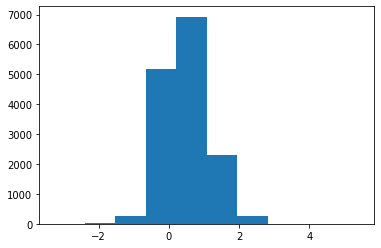

In [28]:
plt.hist(df1['tem_change'])

It looks like the temperature change follows normality. Its on average a positive number (0.48). This suggests that the temperature change has been positive and thus, implying a global warming sitution in the world.

#### Is there a significant correlation between year and temperature change?



In [29]:
# let us take the average of temperature change over years.
clim_year = df1.groupby('year')['tem_change'].mean().reset_index()

In [30]:
# lets find the correlation using the defined method
var_corr_test(clim_year['year'],clim_year['tem_change'])


we reject the null hypothesis of normality
There is a significant correlation of  0.9294564582115723 between the given number of variables using spearman method 
There is a significant correlation of  0.7744009351256574 between the given number of variables using kendell method


Text(0.5, 1.0, 'Temperature Change over time')

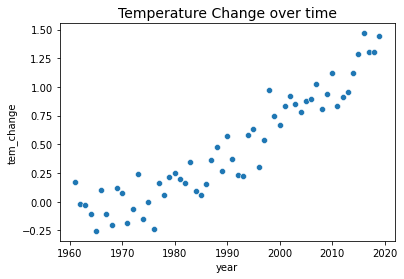

In [31]:
# plotting the graph too
sns.scatterplot(clim_year['year'],clim_year['tem_change'])
plt.title('Temperature Change over time',fontsize=14)

From the above, we can see that there is a strong and positive correlation between year and average temp_change as shown by the scatterplot and correlation test.


This implies that there has been a rise in temperature with the time passage.

### let us see if there is a change in temperature change over decades.

In [52]:
# look at decade year
clim_year.head()

,year,tem_change
0,1961,0.170922
1,1962,-0.022873
2,1963,-0.028361
3,1964,-0.106037
4,1965,-0.254930


In [33]:
clim_year_Less_1981 = clim_year[clim_year['year'] <=1981]['tem_change']
clim_year_Less_2001 = clim_year[(clim_year['year'] <=2001) & (clim_year['year'] >1981)]['tem_change']
clim_year_Less_2021= clim_year[(clim_year['year'] <=2021) & (clim_year['year'] >2001)]['tem_change']

#### We will look for a different in temperature change over period of 2 decades.

We have three groups of samples:

* Temp change before 1981
* Temp change before 2001
* Temp change before 2021


The null hypothesis would be:

There is no significant change in average temp over the period of 2 decades

The alternative would be:

There is a significant change in average temp over the period of 2 decades.




We would be conducting anova test with regard to it.


This test basically compares the variance within each group of value to that of the other groups.


There are two types of test:


f_oneway:

it assumes all the samples are from normal distribution , standard deviation should be equal for all groups.


Kruskal and alexandergovern) ⁉


Although it does not assume much, it may lead to loss of power.




##### Comparing the normality of each variable





In [34]:
# using is_normal method
is_normal(clim_year_Less_1981)
is_normal(clim_year_Less_2001)
is_normal(clim_year_Less_2021)

there is normality present in the data
there is normality present in the data
we reject the null hypothesis of normality


IN one of the dataset, we do not find the assumption of normality , we would be going with non-paramtric kruskal and alexandergovern.


The kruskal is based on the null hypothesis that the median would be same for all groups.





In [35]:
from scipy.stats import kruskal, alexandergovern
print(kruskal(clim_year_Less_1981,clim_year_Less_2001,clim_year_Less_2021))
print(alexandergovern(clim_year_Less_1981,clim_year_Less_2001,clim_year_Less_2021))

KruskalResult(statistic=45.51778853914445, pvalue=1.3059838442452046e-10)
AlexanderGovernResult(statistic=75.41550339680956, pvalue=4.204666090293736e-17)


Looking at the above test statistics , we can say that there is a significant different in temp change decade wise.

In [36]:
# look at the mean value
print(clim_year_Less_1981.mean())
print(clim_year_Less_2001.mean())
print(clim_year_Less_2021.mean())

0.010397058131538931
0.4299526457446826
1.0478844729124221


(-0.5, 58.5, -0.3410910488077496, 1.554444811847988)

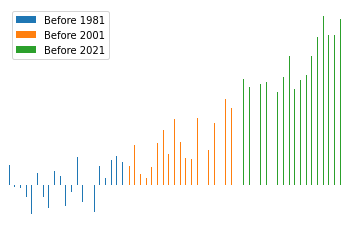

In [37]:
# forming a dataframe
clim_decade  = pd.DataFrame({'Before 1981':clim_year_Less_1981,'Before 2001':clim_year_Less_2001,'Before 2021':clim_year_Less_2021})
clim_decade.plot(kind='bar')
plt.axis('off')

The above graph shares the reality.

It tells us initially, there were even falling temperature change(global cold) However with passage of time, there has been more industrialization and city movement, it has caused a sharp rise in the temperature (especially after 2001).

In [38]:
# read csv
cont_country  = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [39]:
cont_country

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [40]:
# renaming column
df1.rename(columns ={'Country Name' :'Country'},inplace=True)
# merging climate change and continent chart
df1_cont  = pd.merge(df1,cont_country,on='Country')

In [41]:
df1.rename(columns ={'Country Name' :'Country'},inplace=True)

In [42]:
df1.isnull().sum()

Country Code    2714
Country            0
year               0
tem_change      1781
dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

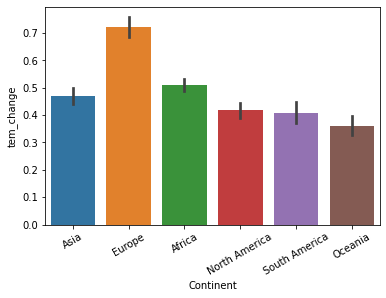

In [43]:
# look at the mean temperature change for all continents
sns.barplot(x='Continent',y='tem_change',data  =df1_cont  )
plt.xticks(rotation=30)

There has been a different in average temp change over different continents.

Apparently, highest temp change was observed in europe , while other experiencing quite similar change. Also, the change was positive througoutly.

Hence, europe is the most affected continent in case of temperature change.

In [44]:
# we can now conduct the test now
df1_cont['Continent'].value_counts()

Africa           2832
Europe           2537
Asia             2065
North America    1298
Oceania           826
South America     590
Name: Continent, dtype: int64

In [45]:
df_asia  = df1_cont[df1_cont['Continent'] == 'Asia']['tem_change'].dropna()
df_africa  = df1_cont[df1_cont['Continent'] == 'Africa']['tem_change'].dropna()
df_europe  = df1_cont[df1_cont['Continent'] == 'Europe']['tem_change'].dropna()
df_north_america =  df1_cont[df1_cont['Continent'] == 'North America']['tem_change'].dropna()
df_oceania = df1_cont[df1_cont['Continent'] == 'Oceania']['tem_change'].dropna()
df_south_america = df1_cont[df1_cont['Continent'] == 'South America']['tem_change'].dropna()

In [46]:
# using is_normal
is_normal(df_asia )
is_normal(df_africa )
is_normal(df_europe)
is_normal(df_north_america )
is_normal(df_oceania  )
is_normal(df_south_america )

we reject the null hypothesis of normality
we reject the null hypothesis of normality
we reject the null hypothesis of normality
we reject the null hypothesis of normality
we reject the null hypothesis of normality
we reject the null hypothesis of normality


In [47]:
 #Using non-parametric test
kruskal(df_asia,df_africa, df_europe,df_north_america,df_oceania,df_south_america)

KruskalResult(statistic=228.6486607270063, pvalue=2.083682761439985e-47)

Thus, there is a significant different in median value for these groups, let us find out which groups are different using turkey test.



In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [49]:
df1_cont.dropna(inplace=True)

In [50]:
x= pairwise_tukeyhsd (df1_cont['tem_change'],df1_cont['Continent'])

In [51]:
print(x)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Africa          Asia  -0.0401   0.31 -0.0957  0.0155  False
       Africa        Europe   0.2207  0.001  0.1661  0.2752   True
       Africa North America  -0.0913  0.001 -0.1535  -0.029   True
       Africa       Oceania  -0.1399  0.001 -0.2195 -0.0602   True
       Africa South America  -0.1013 0.0066 -0.1841 -0.0184   True
         Asia        Europe   0.2608  0.001  0.2014  0.3202   True
         Asia North America  -0.0511 0.2414 -0.1176  0.0154  False
         Asia       Oceania  -0.0997 0.0081 -0.1828 -0.0167   True
         Asia South America  -0.0612 0.3283 -0.1473   0.025  False
       Europe North America  -0.3119  0.001 -0.3775 -0.2463   True
       Europe       Oceania  -0.3605  0.001 -0.4429 -0.2782   True
       Europe South America  -0.3219  0.001 -0.4074 -0.2365   

You find the following things:


Most of the groups are different from each other.

# Conclusion:

In the above analysis, we started with exploration of national indicators of each economy. Through the thorough analysis, we have arrived at the following
answers:


## National Indicators:


***Is there significant relationship between happiness score and gdp per capita?***

There is a positive and strong correlation between happiness score and gdp per capita. It implies as people become richer, they tend to get more happy.

***Is there significant relationship between generosity and income?***


The relationship between generosity and income seems to be insignificant. It suggests that we cannot say with certainty that people will become more generous with a higher income earned.




***Is there significant relationship between income and corruption?***

There is a positive and mild correlation between generosity and gdp per capita. It implies as people become richer, they tend to involve more in corruption activities.

## Climate Change:


***Is there a significance difference in temperature change for different continents?***


Although there has been global warming all over the world, yet its impact has not been same in magnitude when compared continent wise. **Continents like Europe** have to suffer more of this global environment situation.



***Is there a significant difference in temperature decade wise?***


This analysis pose a major challenge for the world. It tells us that with time, we have been facing more of global warming.




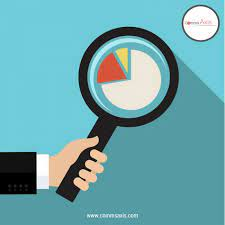
## Business Impact:


The given analysis conveys the following insights for the business:


* Although the world has been focussing more on global warming issue, it needs to be more awared and take more steps to the current alarming situation.


* Some continents are facing more of global warming (such as Europe). These continents or groups of nations must be more involved in activities/ plans that help in countering the global warming problem.


* Happiness of a nation is highly correlated with factors  such as income per capita. So focussing on factors impacting income such as corruption will have a positive impact on the happiness level of an economy.










### To be done


* ORGANIZE THE WORK ON THIS TEST BASED NOTEBOOK. done

* Reading the anova test related from tim frost book. and go over the new project

